# Simple examples of handling missing data on time series

## Libs imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime
import random

## Import data.
## Data from : https://www.meteoblue.com/en/weather/archive/export/athens_greece_264371

In [2]:
df = pd.read_csv("history_export_2018-12-04T18_30_11.csv",skiprows=12, header=None,
                 delimiter=';', names=['year',
                                       'month',
                                       'day',
                                       'hour',
                                       'minute',
                                       'temp',
                                       'shortwave_rad'])

In [3]:
df['Datetime']=pd.to_datetime(df[['year','month','day','hour']])
df.head()

,year,month,day,hour,minute,temp,shortwave_rad,Datetime
0,2018,11,27,0,0,16.79,0.0,2018-11-27 00:00:00
1,2018,11,27,1,0,16.71,0.0,2018-11-27 01:00:00
2,2018,11,27,2,0,16.58,0.0,2018-11-27 02:00:00
3,2018,11,27,3,0,16.18,0.0,2018-11-27 03:00:00
4,2018,11,27,4,0,15.94,0.0,2018-11-27 04:00:00


In [4]:
df.drop(columns=['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

In [5]:
df.head()

,temp,shortwave_rad,Datetime
0,16.79,0.0,2018-11-27 00:00:00
1,16.71,0.0,2018-11-27 01:00:00
2,16.58,0.0,2018-11-27 02:00:00
3,16.18,0.0,2018-11-27 03:00:00
4,15.94,0.0,2018-11-27 04:00:00


In [6]:
df.set_index('Datetime', inplace=True)

In [7]:
df.head()

,temp,shortwave_rad
Datetime,,
2018-11-27 00:00:00,16.79,0.0
2018-11-27 01:00:00,16.71,0.0
2018-11-27 02:00:00,16.58,0.0
2018-11-27 03:00:00,16.18,0.0
2018-11-27 04:00:00,15.94,0.0


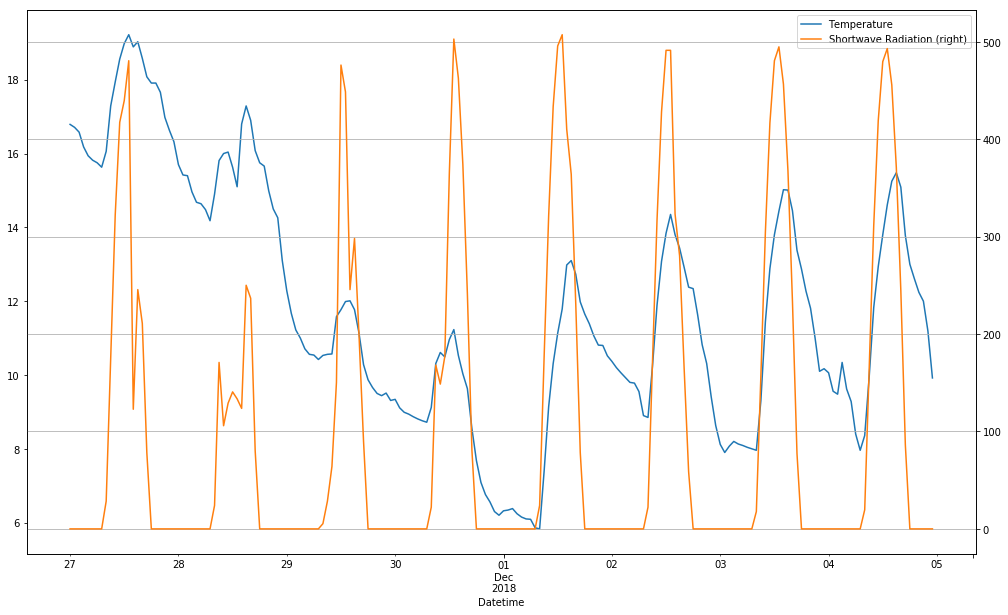

In [8]:
plt.figure(figsize=(17, 10))
df.temp.plot(label="Temperature", legend=True)
df.shortwave_rad.plot(secondary_y=True, label="Shortwave Radiation", legend=True);
plt.grid(True)

In [9]:
df.drop('shortwave_rad', axis=1, inplace=True)
df.head()

,temp
Datetime,
2018-11-27 00:00:00,16.79
2018-11-27 01:00:00,16.71
2018-11-27 02:00:00,16.58
2018-11-27 03:00:00,16.18
2018-11-27 04:00:00,15.94


In [10]:
#df.index = pd.to_datetime(df.index)

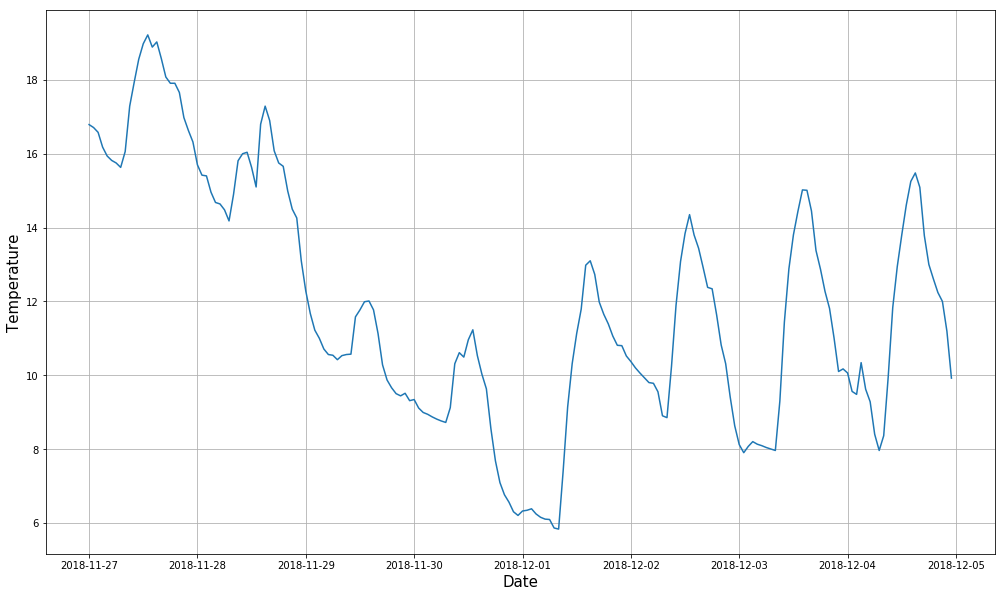

In [11]:
plt.figure(figsize=(17, 10))
plt.plot(df)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.grid(True)

In [12]:
df_mv = df.copy()

## Random pick [0-30] values from the dataset and replace them with nan

In [13]:
for k in range(0,30):
        df_mv.temp[random.randint(0, 191)] = np.nan

## The actual number of the replaced from the dataset

In [14]:
df_mv.temp.isnull().sum()

26

## Create a third column which have the original dataset and visualize it with the missing one

In [15]:
df_mv['Original_Temp']= df['temp']

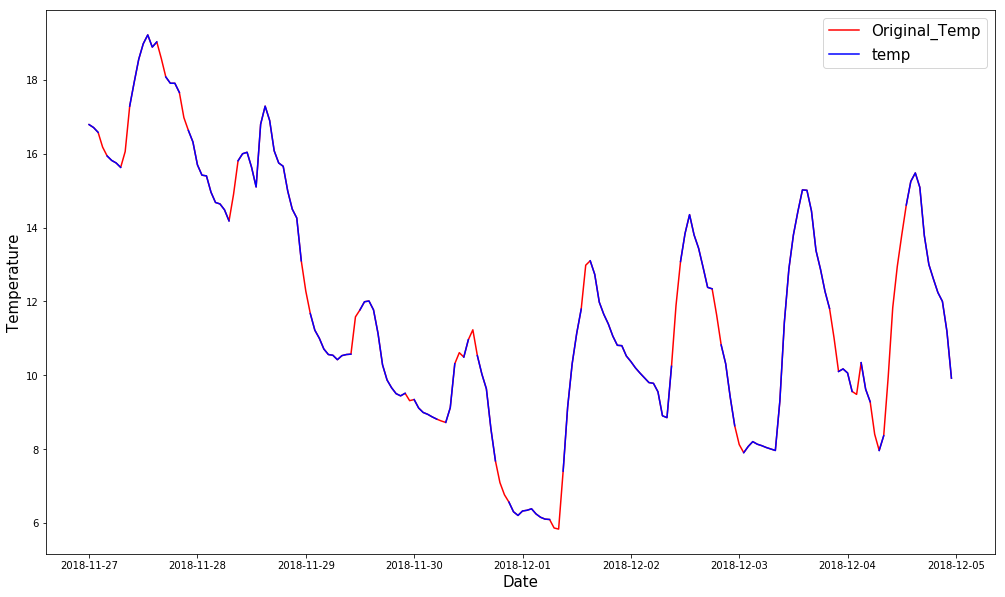

In [16]:
plt.figure(figsize=(17, 10))
plt.plot(df_mv.Original_Temp, c='r')
plt.plot(df_mv.temp, c='b')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.legend(loc='upper right', fontsize=15);

## Blue colored graph contains the dataset which we replaces 28 values with nan, red is the original dataset graph

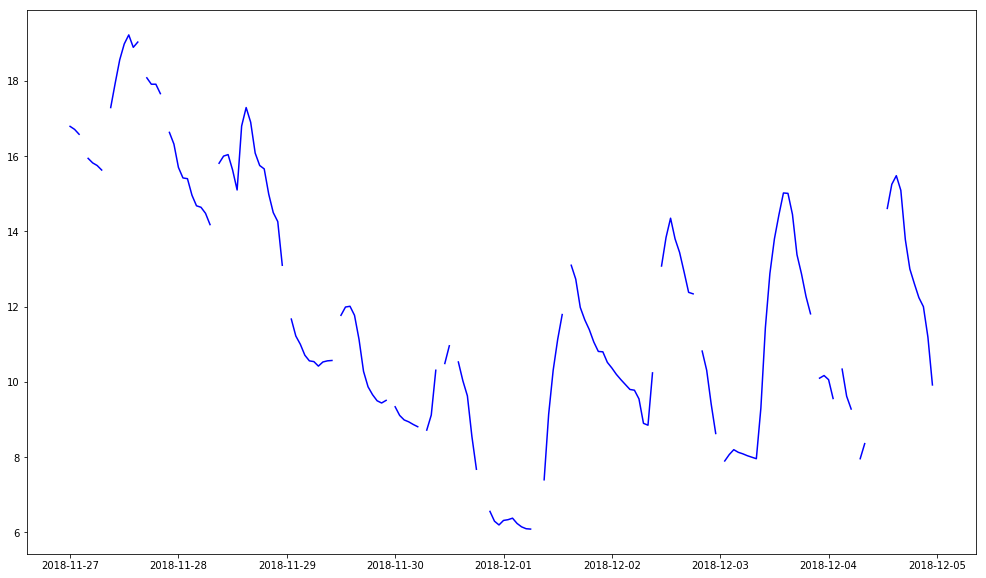

In [17]:
plt.figure(figsize=(17, 10))
plt.plot(df_mv.temp, c='b');

In [18]:
df_mv.head(20)

,temp,Original_Temp
Datetime,,
2018-11-27 00:00:00,16.79,16.79
2018-11-27 01:00:00,16.71,16.71
2018-11-27 02:00:00,16.58,16.58
2018-11-27 03:00:00,NaN,16.18
2018-11-27 04:00:00,15.94,15.94
2018-11-27 05:00:00,15.82,15.82
2018-11-27 06:00:00,15.75,15.75
2018-11-27 07:00:00,15.63,15.63
2018-11-27 08:00:00,NaN,16.06


## Method "fillna()"

In [19]:
df_mv_copy = df_mv.copy()

### Replace nan with a number

In [20]:
df_mv_copy = df_mv_copy.fillna(1)

In [21]:
df_mv_copy.head(10)

,temp,Original_Temp
Datetime,,
2018-11-27 00:00:00,16.79,16.79
2018-11-27 01:00:00,16.71,16.71
2018-11-27 02:00:00,16.58,16.58
2018-11-27 03:00:00,1.00,16.18
2018-11-27 04:00:00,15.94,15.94
2018-11-27 05:00:00,15.82,15.82
2018-11-27 06:00:00,15.75,15.75
2018-11-27 07:00:00,15.63,15.63
2018-11-27 08:00:00,1.00,16.06


### Replace nan using a dictionary

In [22]:
df_mv_copy = df_mv.fillna({
    'temp': -9999 
})
# We can chose which column we want to replace nan values with a number

In [23]:
df_mv_copy.head(10)

,temp,Original_Temp
Datetime,,
2018-11-27 00:00:00,16.79,16.79
2018-11-27 01:00:00,16.71,16.71
2018-11-27 02:00:00,16.58,16.58
2018-11-27 03:00:00,-9999.00,16.18
2018-11-27 04:00:00,15.94,15.94
2018-11-27 05:00:00,15.82,15.82
2018-11-27 06:00:00,15.75,15.75
2018-11-27 07:00:00,15.63,15.63
2018-11-27 08:00:00,-9999.00,16.06


## Method "ffill", replace the nan value with the previous value

In [24]:
df_mv_copy = df_mv.copy()
df_mv_copy = df_mv.fillna(method='ffill')

# df_mv_copy = df_mv.fillna(method='bfill', axis='columns') Replace horizontally using the values on the left.

In [25]:
df_mv_copy.head(8)

,temp,Original_Temp
Datetime,,
2018-11-27 00:00:00,16.79,16.79
2018-11-27 01:00:00,16.71,16.71
2018-11-27 02:00:00,16.58,16.58
2018-11-27 03:00:00,16.58,16.18
2018-11-27 04:00:00,15.94,15.94
2018-11-27 05:00:00,15.82,15.82
2018-11-27 06:00:00,15.75,15.75
2018-11-27 07:00:00,15.63,15.63


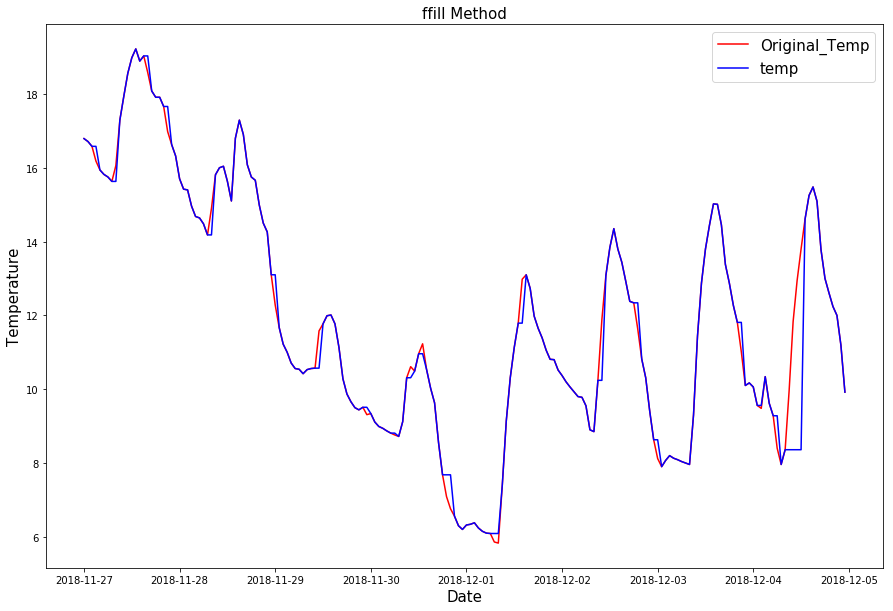

In [26]:
plt.figure(figsize=(15, 10))
plt.plot(df_mv_copy.Original_Temp, c='r')
plt.plot(df_mv_copy.temp, c='b')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.title('ffill Method', fontsize=15);

## Method "bfill", replace nan values with the future/next value

In [27]:
df_mv_copy = df_mv.copy()

In [28]:
df_mv_copy = df_mv.fillna(method='bfill')

# df_mv_copy = df_mv.fillna(method='bfill', axis='columns') Replace horizontally using the values on the right.

In [29]:
df_mv_copy.head(10)

,temp,Original_Temp
Datetime,,
2018-11-27 00:00:00,16.79,16.79
2018-11-27 01:00:00,16.71,16.71
2018-11-27 02:00:00,16.58,16.58
2018-11-27 03:00:00,15.94,16.18
2018-11-27 04:00:00,15.94,15.94
2018-11-27 05:00:00,15.82,15.82
2018-11-27 06:00:00,15.75,15.75
2018-11-27 07:00:00,15.63,15.63
2018-11-27 08:00:00,17.29,16.06


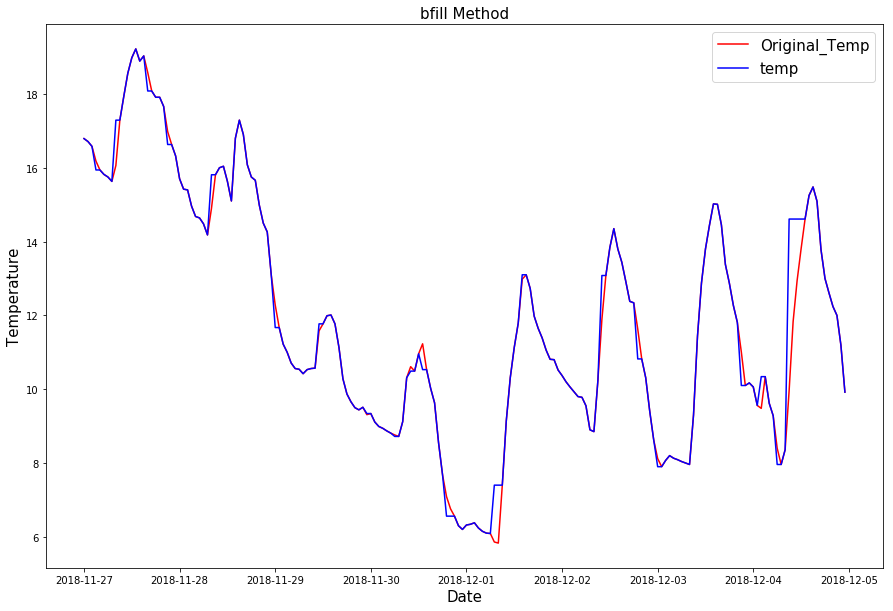

In [30]:
plt.figure(figsize=(15, 10))
plt.plot(df_mv_copy.Original_Temp, c='r')
plt.plot(df_mv_copy.temp, c='b')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.title('bfill Method', fontsize=15);

## Delete the rows containing nan values

In [31]:
df_mv_copy = df_mv.copy()

In [32]:
df_mv_copy = df_mv_copy.dropna()

In [33]:
df_mv_copy.head(10)

,temp,Original_Temp
Datetime,,
2018-11-27 00:00:00,16.79,16.79
2018-11-27 01:00:00,16.71,16.71
2018-11-27 02:00:00,16.58,16.58
2018-11-27 04:00:00,15.94,15.94
2018-11-27 05:00:00,15.82,15.82
2018-11-27 06:00:00,15.75,15.75
2018-11-27 07:00:00,15.63,15.63
2018-11-27 09:00:00,17.29,17.29
2018-11-27 10:00:00,17.94,17.94


## Replace missing values with the column mean

In [34]:
df_mv_copy = df_mv.copy()

In [35]:
df_mv_copy['temp'].fillna((df_mv_copy['temp'].mean()), inplace=True)
df_mv_copy['temp'].mean()

11.969698795180724

In [36]:
df_mv_copy.head(10)

,temp,Original_Temp
Datetime,,
2018-11-27 00:00:00,16.790000,16.79
2018-11-27 01:00:00,16.710000,16.71
2018-11-27 02:00:00,16.580000,16.58
2018-11-27 03:00:00,11.969699,16.18
2018-11-27 04:00:00,15.940000,15.94
2018-11-27 05:00:00,15.820000,15.82
2018-11-27 06:00:00,15.750000,15.75
2018-11-27 07:00:00,15.630000,15.63
2018-11-27 08:00:00,11.969699,16.06


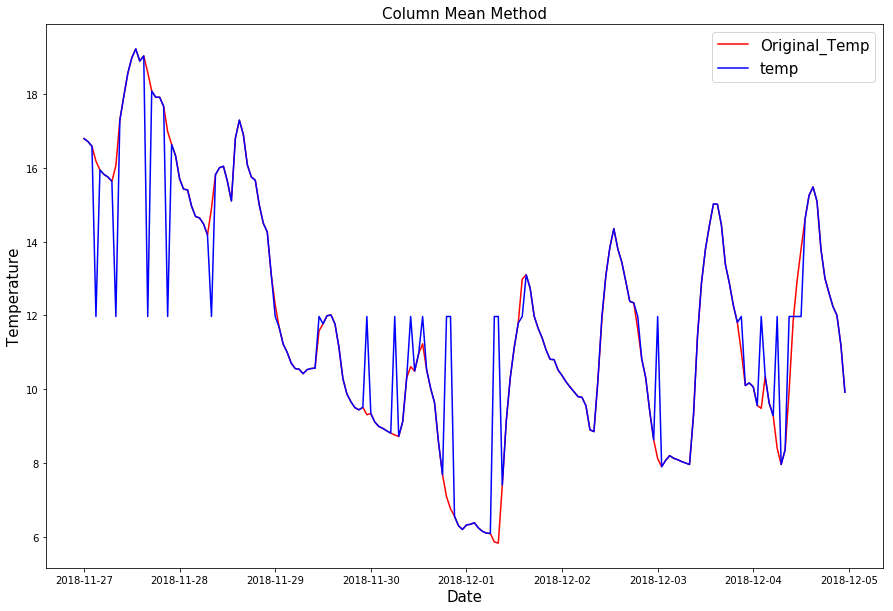

In [37]:
plt.figure(figsize=(15, 10))
plt.plot(df_mv_copy.Original_Temp, c='r')
plt.plot(df_mv_copy.temp, c='b')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.title('Column Mean Method', fontsize=15);

## We can clearly see that the method isnt useful. Below the "Rolling Mean" method where it replaces the missing values based on their local mean

In [38]:
df_mv_copy = df_mv.copy()

In [39]:
df_mv_copy_2 = df_mv_copy.fillna(df_mv_copy.rolling(min_periods=1, center=True, window=5).mean());
df_mv_copy.update(df_mv_copy_2)

In [40]:
df_mv_copy.head()

,temp,Original_Temp
Datetime,,
2018-11-27 00:00:00,16.7900,16.79
2018-11-27 01:00:00,16.7100,16.71
2018-11-27 02:00:00,16.5800,16.58
2018-11-27 03:00:00,16.2625,16.18
2018-11-27 04:00:00,15.9400,15.94


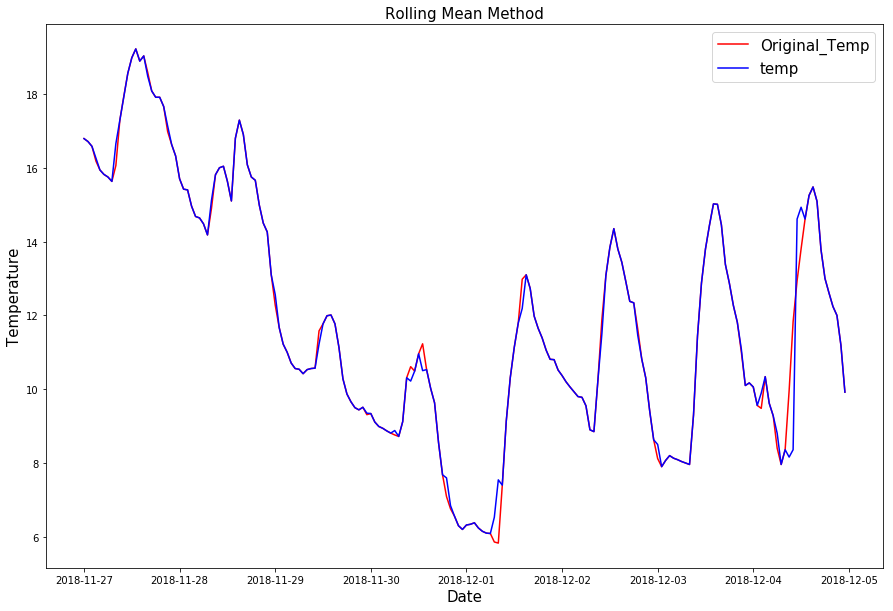

In [41]:
plt.figure(figsize=(15, 10))
plt.plot(df_mv_copy.Original_Temp, c='r')
plt.plot(df_mv_copy.temp, c='b')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.title('Rolling Mean Method', fontsize=15);

## Method "Interpolate()"

In [42]:
df_mv_copy = df_mv.copy()

In [43]:
pd.options.display.float_format = '{:,.2f}'.format
df_mv_copy = df_mv_copy.interpolate()
#Default, η μεθοδος interpolate() βρισκει τις τιμες που λειπουν γραμμικα.

In [44]:
df_mv_copy.head(10)

,temp,Original_Temp
Datetime,,
2018-11-27 00:00:00,16.79,16.79
2018-11-27 01:00:00,16.71,16.71
2018-11-27 02:00:00,16.58,16.58
2018-11-27 03:00:00,16.26,16.18
2018-11-27 04:00:00,15.94,15.94
2018-11-27 05:00:00,15.82,15.82
2018-11-27 06:00:00,15.75,15.75
2018-11-27 07:00:00,15.63,15.63
2018-11-27 08:00:00,16.46,16.06


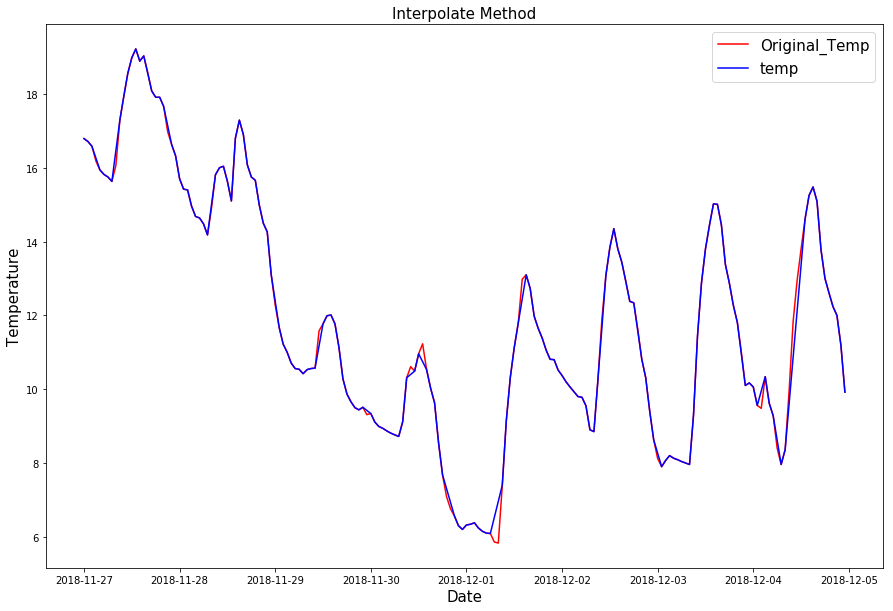

In [45]:
plt.figure(figsize=(15, 10))
plt.plot(df_mv_copy.Original_Temp, c='r')
plt.plot(df_mv_copy.temp, c='b')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.title('Interpolate Method', fontsize=15);

In [46]:
df_mv_copy = df_mv.copy()

In [47]:
df_mv_copy = df_mv_copy.interpolate(method='time')
# Takes into account the date and use it to find the missing value.

In [48]:
df_mv_copy.head()
# The data are taken hourly, the results are the same.(Linear)

,temp,Original_Temp
Datetime,,
2018-11-27 00:00:00,16.79,16.79
2018-11-27 01:00:00,16.71,16.71
2018-11-27 02:00:00,16.58,16.58
2018-11-27 03:00:00,16.26,16.18
2018-11-27 04:00:00,15.94,15.94


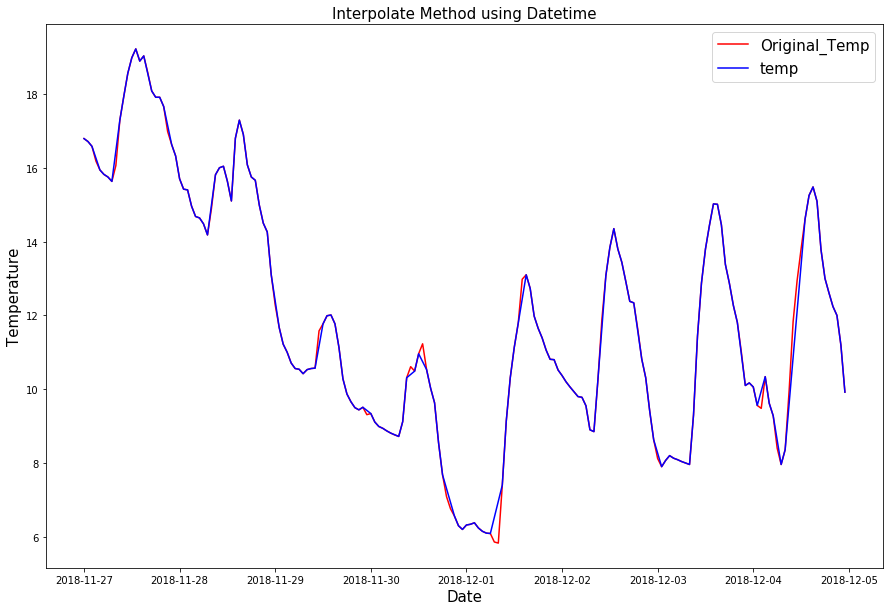

In [49]:
plt.figure(figsize=(15, 10))
plt.plot(df_mv_copy.Original_Temp, c='r')
plt.plot(df_mv_copy.temp, c='b')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.title('Interpolate Method using Datetime', fontsize=15);

In [50]:
df_mv_copy = df_mv.copy()

In [51]:
df_mv_copy.interpolate(method='pchip', inplace=True)
df_mv_copy.head()

,temp,Original_Temp
Datetime,,
2018-11-27 00:00:00,16.79,16.79
2018-11-27 01:00:00,16.71,16.71
2018-11-27 02:00:00,16.58,16.58
2018-11-27 03:00:00,16.26,16.18
2018-11-27 04:00:00,15.94,15.94


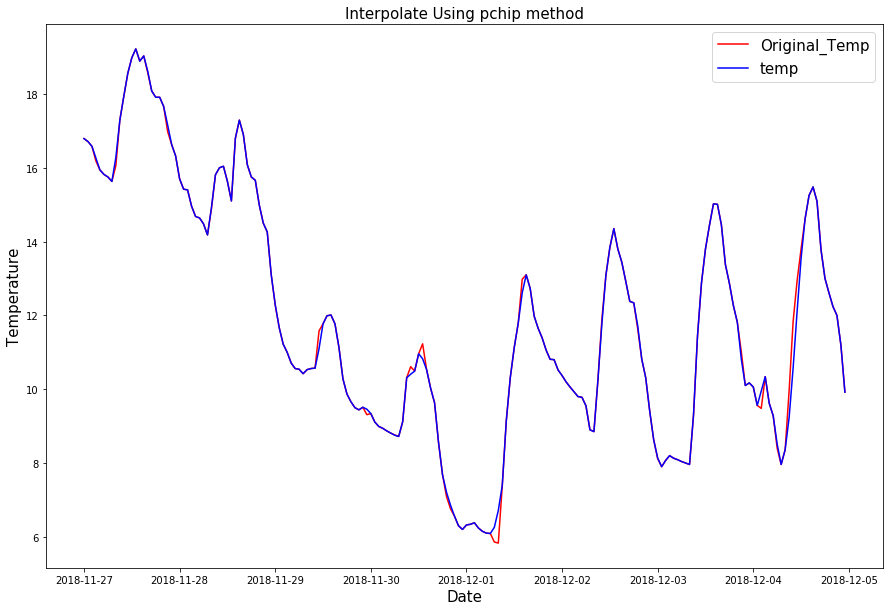

In [52]:
plt.figure(figsize=(15, 10))
plt.plot(df_mv_copy.Original_Temp, c='r')
plt.plot(df_mv_copy.temp, c='b')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.legend(loc='upper right', fontsize=15);
plt.title('Interpolate Using ''pchip'' method', fontsize=15);

In [53]:
df_mv_copy = df_mv.copy()

In [54]:
df_mv_copy.interpolate(method='polynomial', order=3, inplace=True)

In [55]:
df_mv_copy.head()

,temp,Original_Temp
Datetime,,
2018-11-27 00:00:00,16.79,16.79
2018-11-27 01:00:00,16.71,16.71
2018-11-27 02:00:00,16.58,16.58
2018-11-27 03:00:00,16.26,16.18
2018-11-27 04:00:00,15.94,15.94


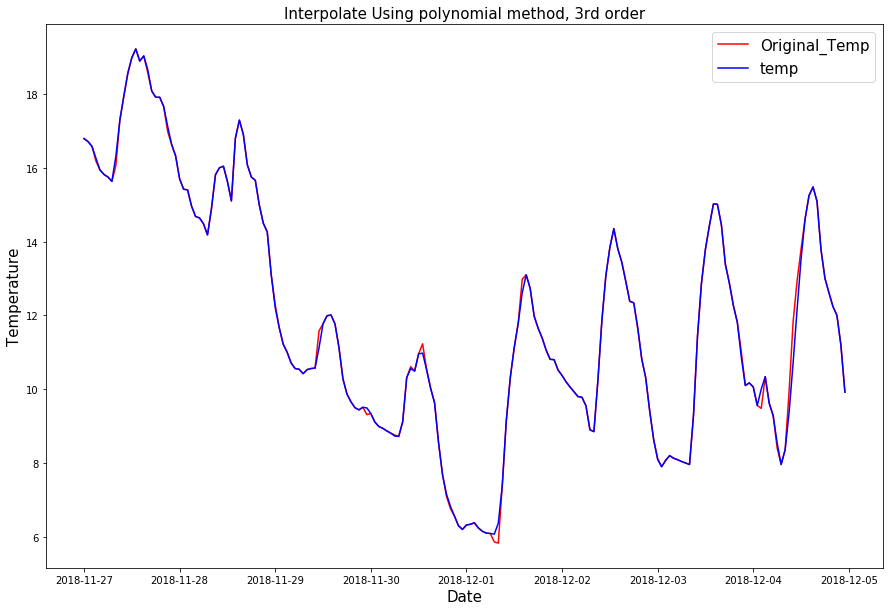

In [56]:
plt.figure(figsize=(15, 10))
plt.plot(df_mv_copy.Original_Temp, c='r')
plt.plot(df_mv_copy.temp, c='b')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.legend(loc='upper right', fontsize=15);
plt.title('Interpolate Using polynomial method, 3rd order', fontsize=15);

In [57]:
df_mv_copy = df_mv.copy()

In [58]:
df_mv_copy.interpolate(method='spline', order=2, inplace=True)

In [59]:
df_mv_copy.head()

,temp,Original_Temp
Datetime,,
2018-11-27 00:00:00,16.79,16.79
2018-11-27 01:00:00,16.71,16.71
2018-11-27 02:00:00,16.58,16.58
2018-11-27 03:00:00,16.58,16.18
2018-11-27 04:00:00,15.94,15.94


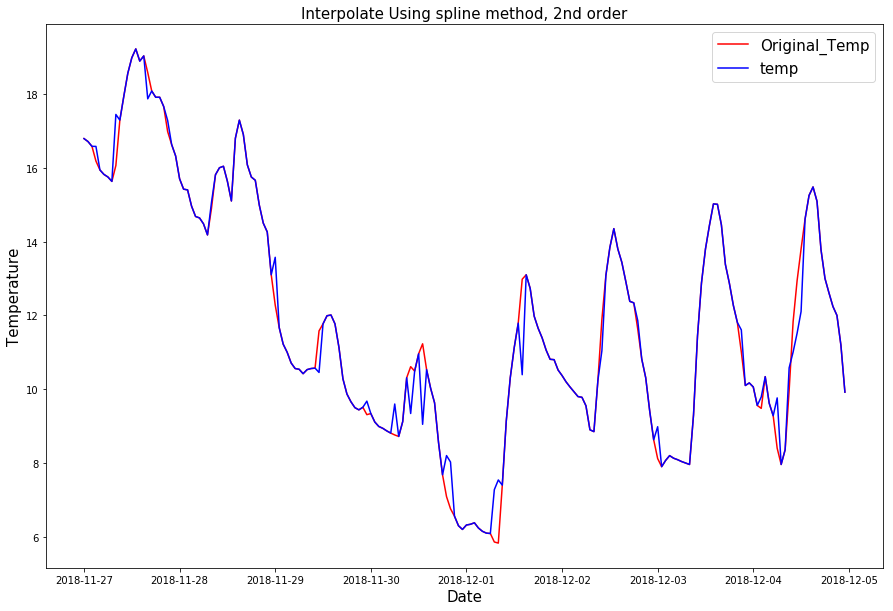

In [60]:
plt.figure(figsize=(15, 10))
plt.plot(df_mv_copy.Original_Temp, c='r')
plt.plot(df_mv_copy.temp, c='b')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.legend(loc='upper right', fontsize=15);
plt.title('Interpolate Using spline method, 2nd order', fontsize=15);

In [61]:
df_mv_copy = df_mv.copy()

In [62]:
df_mv_copy.interpolate(method='quadratic', inplace=True)

In [63]:
df_mv_copy.head()

,temp,Original_Temp
Datetime,,
2018-11-27 00:00:00,16.79,16.79
2018-11-27 01:00:00,16.71,16.71
2018-11-27 02:00:00,16.58,16.58
2018-11-27 03:00:00,16.26,16.18
2018-11-27 04:00:00,15.94,15.94


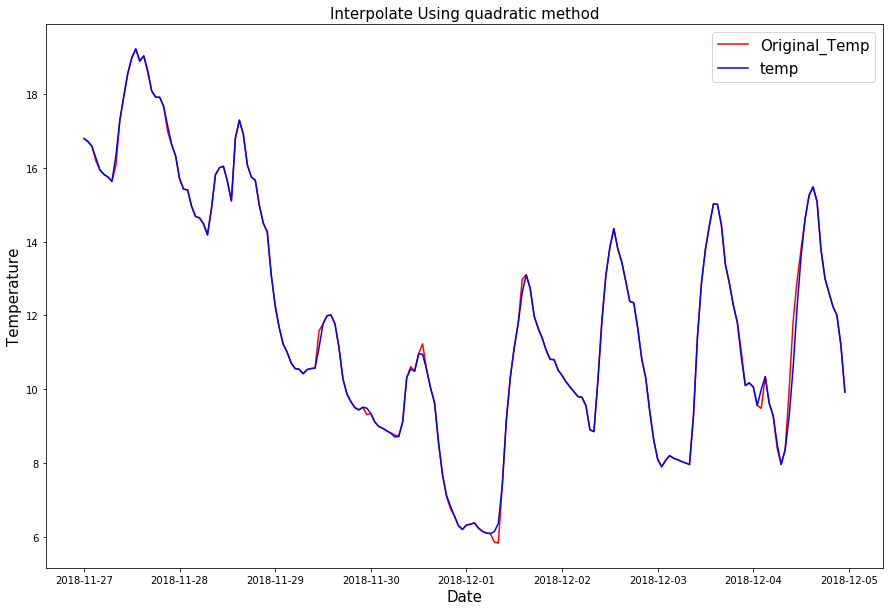

In [64]:
plt.figure(figsize=(15, 10))
plt.plot(df_mv_copy.Original_Temp, c='r')
plt.plot(df_mv_copy.temp, c='b')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.legend(loc='upper right', fontsize=15);
plt.title('Interpolate Using quadratic method', fontsize=15);

In [65]:
df_mv_copy = df_mv.copy()

In [66]:
df_mv_copy.interpolate(method='cubic', order=6, inplace=True)

In [67]:
df_mv_copy.head()

,temp,Original_Temp
Datetime,,
2018-11-27 00:00:00,16.79,16.79
2018-11-27 01:00:00,16.71,16.71
2018-11-27 02:00:00,16.58,16.58
2018-11-27 03:00:00,16.26,16.18
2018-11-27 04:00:00,15.94,15.94


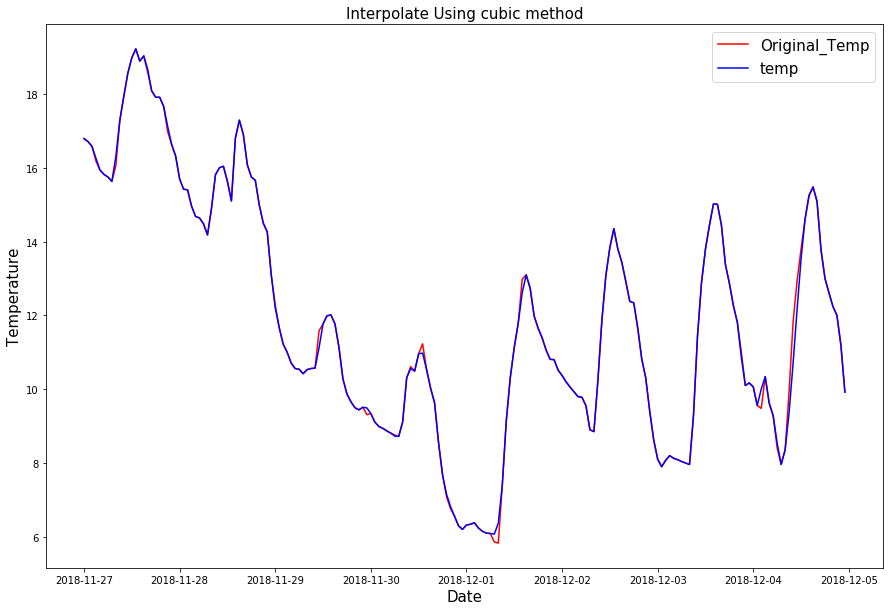

In [68]:
plt.figure(figsize=(15, 10))
plt.plot(df_mv_copy.Original_Temp, c='r')
plt.plot(df_mv_copy.temp, c='b')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.legend(loc='upper right', fontsize=15);
plt.title('Interpolate Using cubic method', fontsize=15);